# Lloyds Banking Group Data Analysis of Customer Churn Dataset 

## Loading Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:\\Users\\91739\\Downloads\\Customer_Churn_Data_Large.csv")

# Check first 5 rows
print(df.head())

   CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low
3           4   21      M       Widowed         Low
4           5   21      M      Divorced      Medium


## Basic Data Exploration

In [2]:
# Check dataset shape
print(f"Dataset shape: {df.shape}")

# Check basic info
print(df.info())

# Summary statistics
print(df.describe())

Dataset shape: (1000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB
None
        CustomerID          Age
count  1000.000000  1000.000000
mean    500.500000    43.267000
std     288.819436    15.242311
min       1.000000    18.000000
25%     250.750000    30.000000
50%     500.500000    43.000000
75%     750.250000    56.000000
max    1000.000000    69.000000


## 3. Exploring Categorical Variables

In [3]:
# Gender distribution
print("\nGender Distribution:")
print(df['Gender'].value_counts())

# Marital Status distribution
print("\nMarital Status Distribution:")
print(df['MaritalStatus'].value_counts())

# Income Level distribution
print("\nIncome Level Distribution:")
print(df['IncomeLevel'].value_counts())


Gender Distribution:
Gender
F    513
M    487
Name: count, dtype: int64

Marital Status Distribution:
MaritalStatus
Widowed     276
Married     261
Divorced    248
Single      215
Name: count, dtype: int64

Income Level Distribution:
IncomeLevel
High      349
Medium    326
Low       325
Name: count, dtype: int64


### Visualizations:

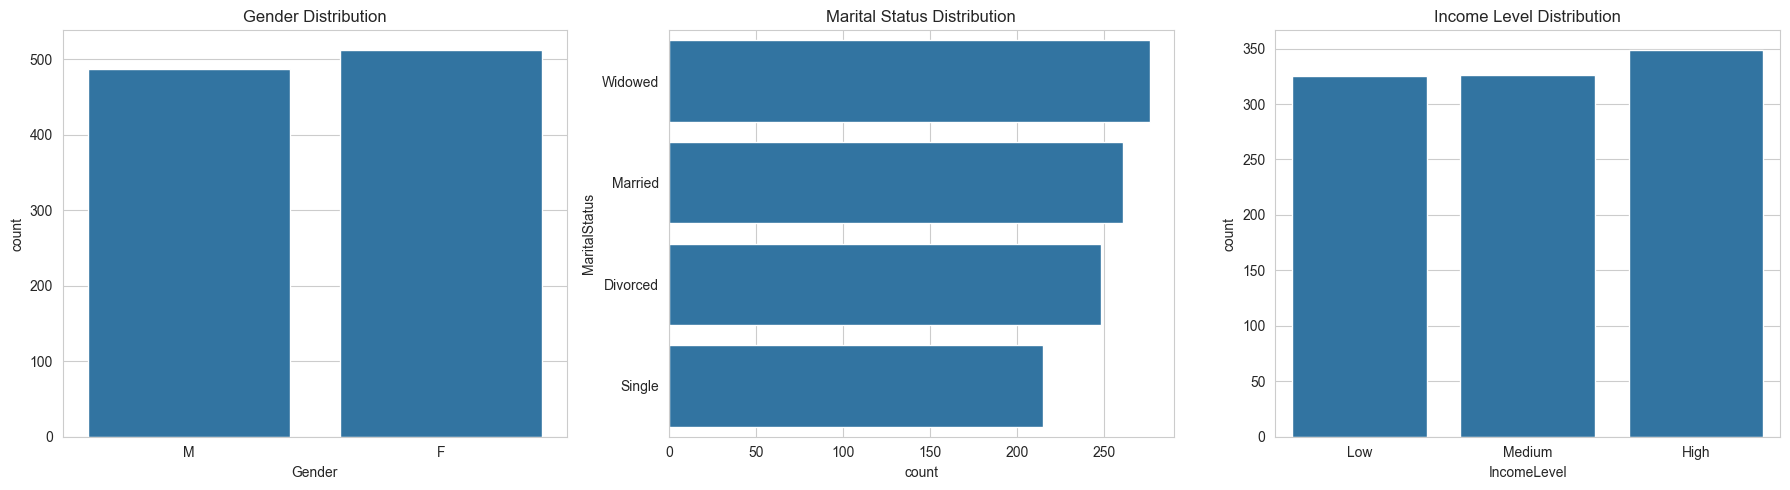

In [4]:
# Set style
sns.set_style("whitegrid")

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender
sns.countplot(data=df, x='Gender', ax=axes[0])
axes[0].set_title('Gender Distribution')

# Marital Status
sns.countplot(data=df, y='MaritalStatus', ax=axes[1], order=df['MaritalStatus'].value_counts().index)
axes[1].set_title('Marital Status Distribution')

# Income Level
sns.countplot(data=df, x='IncomeLevel', ax=axes[2], order=['Low','Medium','High'])
axes[2].set_title('Income Level Distribution')

plt.tight_layout()
plt.show()

## 4. Analyzing Age Distribution

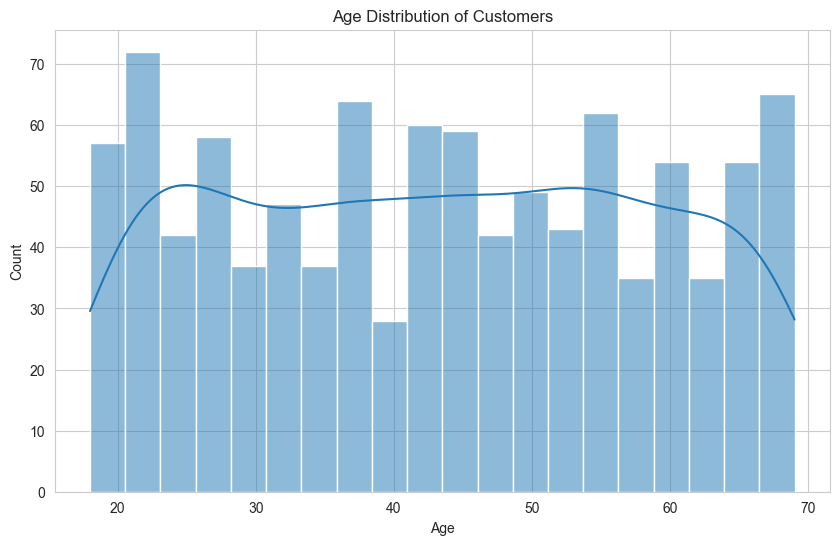

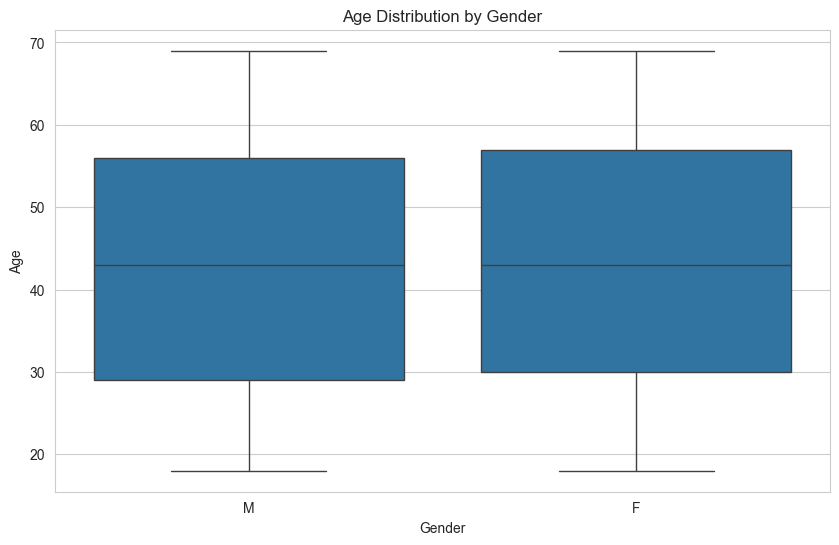

In [5]:
# Age distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Age by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('Age Distribution by Gender')
plt.show()

## 5. Exploring Relationships Between Variables

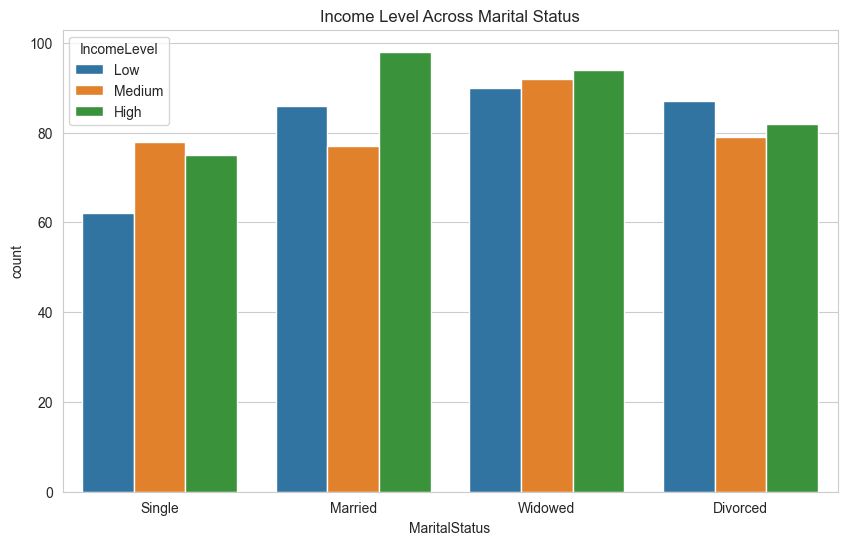

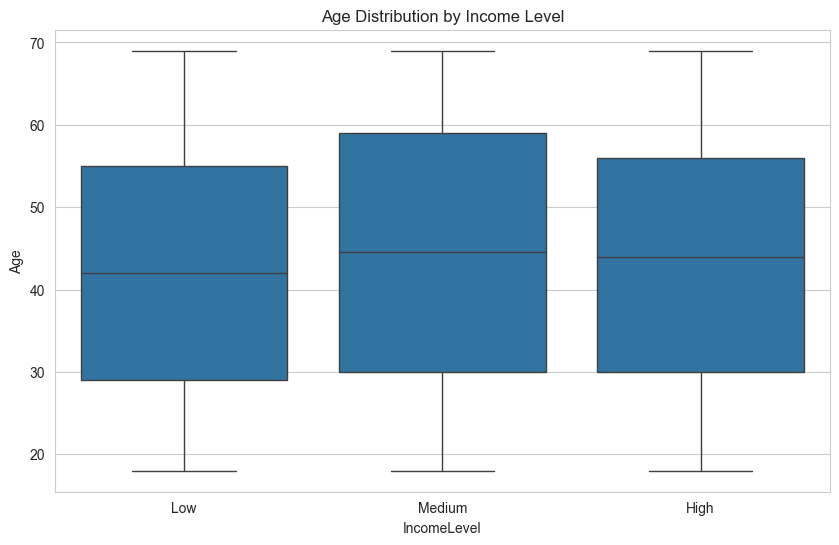

In [6]:
# Marital Status vs Income Level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MaritalStatus', hue='IncomeLevel', 
             hue_order=['Low','Medium','High'])
plt.title('Income Level Across Marital Status')
plt.show()

# Age distribution by Income Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='IncomeLevel', y='Age', order=['Low','Medium','High'])
plt.title('Age Distribution by Income Level')
plt.show()

## 6. Checking for Data Anomalies

In [7]:
# Check youngest widowed customers
print("\nYoungest Widowed Customers:")
print(df[df['MaritalStatus'] == 'Widowed'].sort_values('Age').head())

# Check oldest single customers
print("\nOldest Single Customers:")
print(df[df['MaritalStatus'] == 'Single'].sort_values('Age', ascending=False).head())


Youngest Widowed Customers:
     CustomerID  Age Gender MaritalStatus IncomeLevel
286         287   18      M       Widowed         Low
80           81   18      F       Widowed         Low
562         563   18      M       Widowed      Medium
548         549   18      M       Widowed        High
35           36   18      F       Widowed         Low

Oldest Single Customers:
     CustomerID  Age Gender MaritalStatus IncomeLevel
252         253   69      M        Single      Medium
529         530   69      F        Single        High
564         565   69      M        Single         Low
757         758   68      M        Single      Medium
580         581   68      F        Single      Medium


## 7. Feature Engineering (Creating Age Groups)



Age Group Distribution:
AgeGroup
45-59    291
30-44    277
18-29    244
60+      188
Name: count, dtype: int64


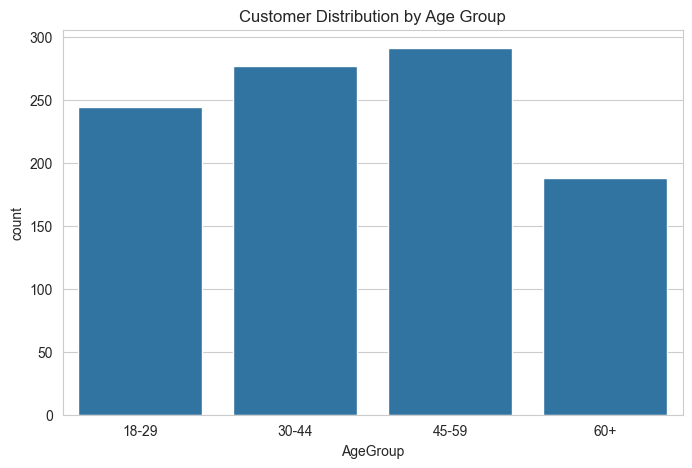

In [8]:
# Create age groups
bins = [18, 30, 45, 60, 70]
labels = ['18-29', '30-44', '45-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Check distribution
print("\nAge Group Distribution:")
print(df['AgeGroup'].value_counts())

# Visualize
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AgeGroup')
plt.title('Customer Distribution by Age Group')
plt.show()

## 8. Analyzing Income by Age Group

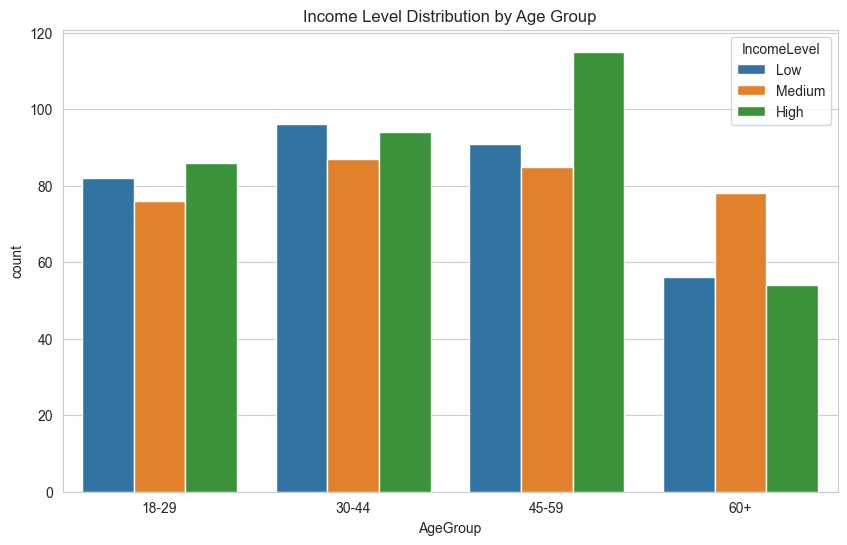

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', hue='IncomeLevel', hue_order=['Low','Medium','High'])
plt.title('Income Level Distribution by Age Group')
plt.show()

## 9. Preparing for Modeling (Data Preprocessing)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'MaritalStatus', 'IncomeLevel', 'AgeGroup']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for later use

# Verify transformation
print(df.head())

   CustomerID  Age  Gender  MaritalStatus  IncomeLevel  AgeGroup
0           1   62       1              2            1         3
1           2   65       1              1            1         3
2           3   18       1              2            1         0
3           4   21       1              3            1         0
4           5   21       1              0            2         0


## 10. Correlation Analysis

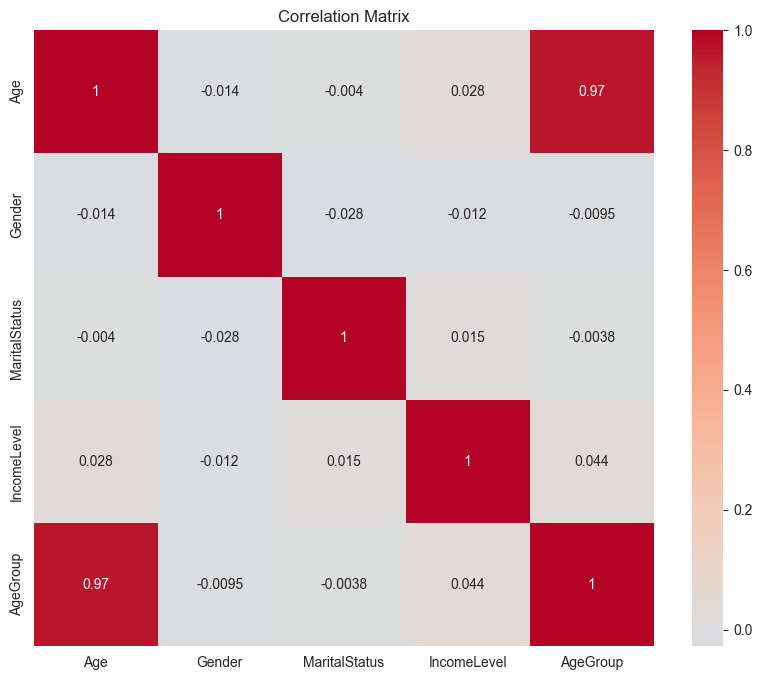

In [11]:
# Calculate correlation matrix
corr = df.drop('CustomerID', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## 11. Saving the Processed Data

In [12]:
# Save processed data
df.to_csv('processed_customer_data.csv', index=False)

print("Data processing complete. File saved as 'processed_customer_data.csv'")

Data processing complete. File saved as 'processed_customer_data.csv'
